Используются CSV-файлы, созданные из «04_prep_imported_data», для обучения, проверки и тестирования нашей модели.
Используется Tensorflow DNNClassifier Estimator

# Загрузка библиотек

In [5]:
!pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.41.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.14.1-py3-none-any.whl (131 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# библиотека для машинного обучения для решения задач построения 
# и тренировки нейронной сети с целью автоматического нахождения 
# и классификации образов, достигая качества человеческого восприятия
import tensorflow as tf


# Загрузка данных

In [5]:
# Тренировочный датасет
df =pd.read_csv("train_testing.csv", header=None)
x_train = df.values[:, : 650000]
y_train = df.values[:,650000: -160].astype(int)

# Датасет для валидации
df = pd.read_csv("validate_testing.csv", header=None)
x_validate = df.values[:,: 650000]
y_validate = df.values[:,650000: -160].astype(int)


# Тестовый датасет
df = pd.read_csv("test_testing.csv", header=None)
x_test = df.values[:, :650000]
y_test = df.values[:,650000:  -160].astype(int)


x [[-0.16  -0.16  -0.16  ... -0.335 -0.32   0.   ]
 [-0.375 -0.375 -0.375 ... -0.235 -0.245  0.   ]
 [ 0.22   0.22   0.22  ... -0.285 -0.28   0.   ]
 ...
 [-0.47  -0.47  -0.47  ... -1.825 -1.74  -1.28 ]
 [-0.095 -0.095 -0.095 ... -0.32  -0.285  0.   ]
 [ 0.21   0.21   0.21  ...  0.015  0.035  0.   ]]
x (17, 650000)
y (17, 650000)
val
x [-0.095 -0.095 -0.095 ... -0.11  -0.115  0.   ]
y (6, 650000)
(6, 1300160)
test
x [0.065 0.065 0.065 ... 0.33  0.325 0.   ]
y (6, 650000)


In [3]:
# Тренировочный датасет
df = pd.read_csv("train.csv", header=None)
x_train = df.values[:, :-3]
y_train = df.values[:, -3].astype(int)

# Датасет для валидации
df = pd.read_csv("validate.csv", header=None)
x_validate = df.values[:, :-3]
y_validate = df.values[:, -3].astype(int)

# Тестовый датасет
df = pd.read_csv("test.csv", header=None)
x_test = df.values[:, :-3]
y_test = df.values[:, -3].astype(int)

print('базы данных загружены и разделены')

y (106684,)
x (106684, 187)
test
x [0.807985 0.742119 0.166668 0.062106 0.005168 0.014112 0.014814 0.070769
 0.093498 0.239962 0.367328 0.44127  0.404072 0.421164 0.458895 0.455241
 0.447922 0.450944 0.440363 0.444857 0.437171 0.406475 0.413817 0.40783
 0.397154 0.397009 0.384698 0.379853 0.373968 0.38597  0.407305 0.437871
 0.456213 0.469936 0.472718 0.487653 0.485593 0.460769 0.468941 0.490352
 0.487741 0.478734 0.482005 0.47378  0.47275  0.49755  0.486706 0.445729
 0.465778 0.451822 0.422779 0.462848 0.485807 0.47842  0.440279 0.450256
 0.476781 0.466138 0.434354 0.481925 0.497106 0.452777 0.483759 0.528163
 0.526337 0.519143 0.509198 0.502144 0.493773 0.493705 0.499944 0.482404
 0.468949 0.44553  0.414521 0.416593 0.462052 0.451573 0.411873 0.399515
 0.443666 0.446789 0.415634 0.383322 0.456626 0.597186 0.664828 0.794622
 1.003395 0.726468 0.180269 0.025931 0.057848 0.046612 0.047055 0.030238
 0.11887  0.222285 0.362827 0.39016  0.435016 0.37278  0.       0.
 0.       0.       0.  

In [11]:
del df

# Визуализация данных
Вывод одного нормального и одного аномального сигнала

In [14]:
C0 = np.argwhere(y_train_v2 == 0).flatten()
C1 = np.argwhere(y_train_v2 == 1).flatten()

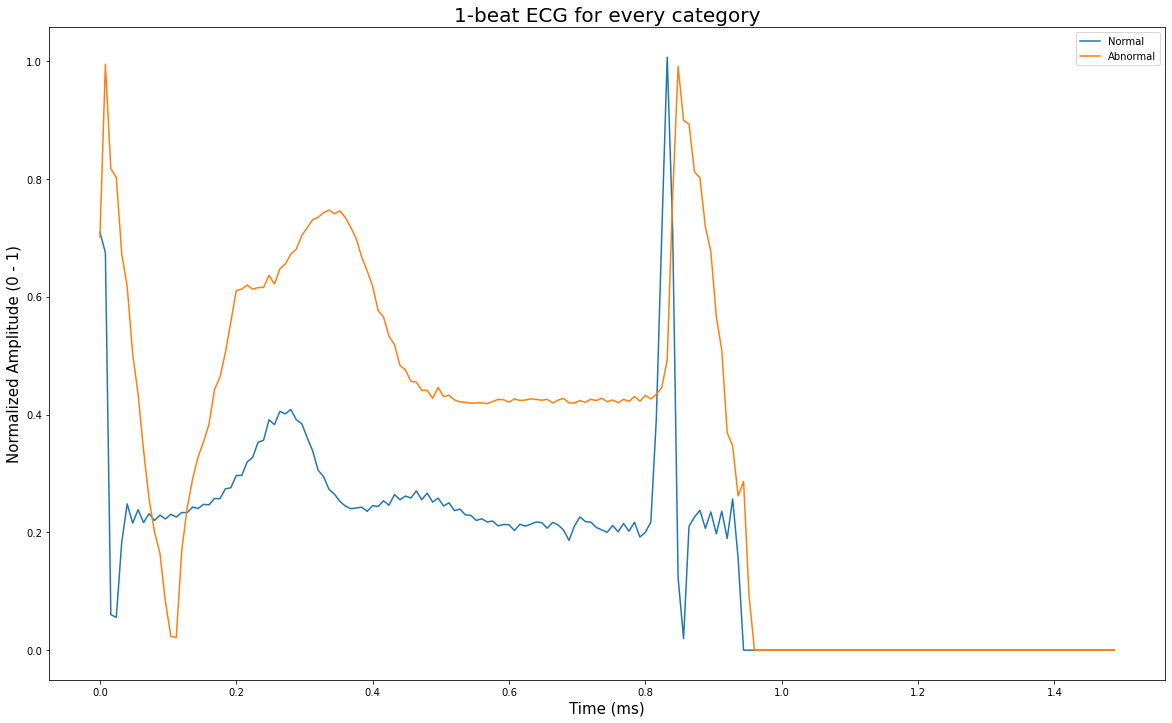

In [15]:
x = np.arange(0, 187)*8/1000.0

plt.figure(figsize=(20,12))
plt.plot(x, x_train_v2[C0, :][0], label="Normal") # Display first normal beat.
plt.plot(x, x_train_v2[C1, :][0], label="Abnormal") # Display first abnormal beat.
plt.legend()
plt.title("ЭКГ с 1 сокращением для каждой категории", fontsize=20)
plt.ylabel("Нормализованная амплитуда (0 - 1)", fontsize=15)
plt.xlabel("Время, мс", fontsize=15)
plt.show()

# Обучение модели
Используется API-интерфейс Tensorflow Estimator для построения модели.

In [31]:
feature_columns = [tf.feature_column.numeric_column('beat', shape = [187])]

est = tf.estimator.DNNClassifier(
   hidden_units  = [256, 64, 16],      # Итерация количества скрытых единиц на уровне. Все слои полностью связаны. 
   feature_columns = feature_columns,  # Содержит все столбцы функций, используемые моделью. 
   model_dir = 'ecg_model_DNN_new',    # Название папки для сохранения модели
   n_classes = 3,                      # Количество классов
                                       # Адам оптимизация 
                                       # Скорость обучения определяет размер шага на каждой итерации при приближении 
                                       # к минимуму функции потерь.
   optimizer = tf.keras.optimizers.Adam(lr=1e-3),
   dropout = 0.1                       # Вероятность выпадения данной координаты
   
)


input_fn_train = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x = {'beat': x_train},
    y = y_train,
    batch_size = 256,
    shuffle = True,
    num_epochs = None
)

# Метрики для оценки алгоритма True Positives, True Negatives, False Positives и False Negatives
metric = [tf.keras.metrics.TruePositives(name='tp'),tf.keras.metrics.TrueNegatives(name='tn'), 
          tf.keras.metrics.FalsePositives(name='fp'),tf.keras.metrics.FalseNegatives(name='fn')]


def tn(labels, predictions):
    auc_metric = tf.keras.metrics.TrueNegatives(name='tn')
    auc_metric.update_state(y_true=labels, y_pred=predictions['logistic'])
    return {'tn': auc_metric}



def fp(labels, predictions):
    auc_metric = tf.keras.metrics.FalsePositives(name='fp')
    auc_metric.update_state(y_true=labels, y_pred=predictions['logistic'])
    return {'fp': auc_metric}

est = tf.estimator.add_metrics(est, tn)
est = tf.estimator.add_metrics(est, fp)   
 # estimator.train(...)
 # estimator.evaluate(...)

[NumericColumn(key='beat', shape=(187,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ecg_model_DNN_new', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_w

# Тренировка модели

In [102]:
est.train(input_fn=input_fn_train, steps=400000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into ecg_model_DNN_new\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6645887, step = 0
INFO:tensorflow:global_step/sec: 453.697
INFO:tensorflow:loss = 0.53004897, step = 100 (0.222 sec)
INFO:tensorflow:global_step/sec: 634.603
INFO:tensorflow:loss = 0.43973184, step = 200 (0.157 sec)
INFO:tensorflow:global_step/sec: 630.615
INFO:tensorflow:loss = 0.41587365, step = 300 (0.160 sec)
INFO:tensorflow:global_step/sec: 634.604
INFO:tensor

INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.06552171, step = 7700 (0.146 sec)
INFO:tensorflow:global_step/sec: 682.094
INFO:tensorflow:loss = 0.12694229, step = 7800 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.497
INFO:tensorflow:loss = 0.09723876, step = 7900 (0.146 sec)
INFO:tensorflow:global_step/sec: 682.094
INFO:tensorflow:loss = 0.08948505, step = 8000 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.061879642, step = 8100 (0.147 sec)
INFO:tensorflow:global_step/sec: 682.093
INFO:tensorflow:loss = 0.124161355, step = 8200 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.16686705, step = 8300 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.104809046, step = 8400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.11297366, step = 8500 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.094387725, step = 8600 (0.145 sec)


INFO:tensorflow:loss = 0.095596276, step = 15800 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.13844085, step = 15900 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.069357954, step = 16000 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.058549657, step = 16100 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.060909163, step = 16200 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.064107716, step = 16300 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.07544664, step = 16400 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.088694, step = 16500 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.081969075, step = 16600 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.06301857, step = 16700 (0.144 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.058131136, step = 23900 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.09451465, step = 24000 (0.147 sec)
INFO:tensorflow:global_step/sec: 683.375
INFO:tensorflow:loss = 0.052047003, step = 24100 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.047879968, step = 24200 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.766
INFO:tensorflow:loss = 0.08505421, step = 24300 (0.146 sec)
INFO:tensorflow:global_step/sec: 681.929
INFO:tensorflow:loss = 0.097032756, step = 24400 (0.147 sec)
INFO:tensorflow:global_step/sec: 691.667
INFO:tensorflow:loss = 0.050244078, step = 24500 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.046548784, step = 24600 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.06531385, step = 24700 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.057361603, step = 24800 (0.144 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 0.05006471, step = 32000 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.060732692, step = 32100 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.06702222, step = 32200 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.032826733, step = 32300 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.069676995, step = 32400 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.11539502, step = 32500 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.042035382, step = 32600 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0372665, step = 32700 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.061071835, step = 32800 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.0497344, step = 32900 (0.145 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.03978227, step = 40100 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.063390054, step = 40200 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.06421296, step = 40300 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.05085936, step = 40400 (0.147 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.06210646, step = 40500 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.031245582, step = 40600 (0.146 sec)
INFO:tensorflow:global_step/sec: 682.09
INFO:tensorflow:loss = 0.045991525, step = 40700 (0.147 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.0384423, step = 40800 (0.147 sec)
INFO:tensorflow:global_step/sec: 682.093
INFO:tensorflow:loss = 0.048064858, step = 40900 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.02018475, step = 41000 (0.146 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.025348103, step = 48200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.021617826, step = 48300 (0.145 sec)
INFO:tensorflow:global_step/sec: 682.092
INFO:tensorflow:loss = 0.036382817, step = 48400 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.024296638, step = 48500 (0.145 sec)
INFO:tensorflow:global_step/sec: 672.937
INFO:tensorflow:loss = 0.03906639, step = 48600 (0.148 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.011521197, step = 48700 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.053809103, step = 48800 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.02512404, step = 48900 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.046801284, step = 49000 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.031590298, step = 49100 (0.144 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.008437963, step = 56300 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.03155066, step = 56400 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.016448988, step = 56500 (0.144 sec)
INFO:tensorflow:global_step/sec: 586.359
INFO:tensorflow:loss = 0.036674067, step = 56600 (0.172 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0077513275, step = 56700 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0455701, step = 56800 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.034036748, step = 56900 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.06218262, step = 57000 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.025453737, step = 57100 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.018594252, step = 57200 (0.144 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 0.010876784, step = 64400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.305
INFO:tensorflow:loss = 0.09931067, step = 64500 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.015590645, step = 64600 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.026076138, step = 64700 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.019590557, step = 64800 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.027705316, step = 64900 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.0075394865, step = 65000 (0.143 sec)
INFO:tensorflow:global_step/sec: 701.168
INFO:tensorflow:loss = 0.01465325, step = 65100 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.015783513, step = 65200 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.503
INFO:tensorflow:loss = 0.024843123, step = 65300 (0.145 sec)
INFO:tensorflow:global

INFO:tensorflow:loss = 0.017228613, step = 72500 (0.145 sec)
INFO:tensorflow:global_step/sec: 682.09
INFO:tensorflow:loss = 0.051037215, step = 72600 (0.148 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.03497333, step = 72700 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.021771993, step = 72800 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.014913302, step = 72900 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.011165859, step = 73000 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.010233648, step = 73100 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.026588362, step = 73200 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.023121472, step = 73300 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.010884088, step = 73400 (0.145 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.023397401, step = 80600 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.05213813, step = 80700 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.011507975, step = 80800 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.014442895, step = 80900 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.015370543, step = 81000 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.024579497, step = 81100 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.012901007, step = 81200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0069333315, step = 81300 (0.147 sec)
INFO:tensorflow:global_step/sec: 672.938
INFO:tensorflow:loss = 0.01782232, step = 81400 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.497
INFO:tensorflow:loss = 0.016755272, step = 81500 (0.145 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.025432859, step = 88700 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.026232675, step = 88800 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.497
INFO:tensorflow:loss = 0.008266792, step = 88900 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.03131984, step = 89000 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.767
INFO:tensorflow:loss = 0.009017848, step = 89100 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.005034108, step = 89200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.305
INFO:tensorflow:loss = 0.011645447, step = 89300 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.029525837, step = 89400 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.052967742, step = 89500 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.021984981, step =

INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.026542813, step = 96800 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.483
INFO:tensorflow:loss = 0.007860001, step = 96900 (0.148 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.03635627, step = 97000 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.014339156, step = 97100 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.012361982, step = 97200 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.013706149, step = 97300 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.011019392, step = 97400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.008925168, step = 97500 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.025275135, step = 97600 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.027265256, step =

INFO:tensorflow:loss = 0.006121563, step = 104800 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.030988203, step = 104900 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.011148814, step = 105000 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.014531836, step = 105100 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.024677977, step = 105200 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.0056239367, step = 105300 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.035077266, step = 105400 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.029659934, step = 105500 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.029588394, step = 105600 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.01450926, step = 105700 (0.145 sec)
INFO:tensor

INFO:tensorflow:loss = 0.025575396, step = 112800 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.008757044, step = 112900 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.168
INFO:tensorflow:loss = 0.02720137, step = 113000 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.504
INFO:tensorflow:loss = 0.043132544, step = 113100 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.169
INFO:tensorflow:loss = 0.013451801, step = 113200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.023360793, step = 113300 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.028335195, step = 113400 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.497
INFO:tensorflow:loss = 0.008518885, step = 113500 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.010456734, step = 113600 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.015022817, step = 113700 (0.143 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.0066317343, step = 120800 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.01043136, step = 120900 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.019132508, step = 121000 (0.145 sec)
INFO:tensorflow:global_step/sec: 682.095
INFO:tensorflow:loss = 0.016438223, step = 121100 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.025988102, step = 121200 (0.147 sec)
INFO:tensorflow:global_step/sec: 691.497
INFO:tensorflow:loss = 0.030184291, step = 121300 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.055032328, step = 121400 (0.143 sec)
INFO:tensorflow:global_step/sec: 677.482
INFO:tensorflow:loss = 0.020429313, step = 121500 (0.148 sec)
INFO:tensorflow:global_step/sec: 682.093
INFO:tensorflow:loss = 0.018515423, step = 121600 (0.148 sec)
INFO:tensorflow:global_step/sec: 630.612
INFO:tensorflow:loss = 0.02318981, step = 121700 (0.159 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.01536784, step = 128800 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0027355258, step = 128900 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.032350842, step = 129000 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.004311278, step = 129100 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.174
INFO:tensorflow:loss = 0.013443651, step = 129200 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.0075486945, step = 129300 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.026396193, step = 129400 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.020893209, step = 129500 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.297
INFO:tensorflow:loss = 0.027835228, step = 129600 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.503
INFO:tensorflow:loss = 0.022958387, step = 129700 (0.145 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.028572906, step = 136800 (0.148 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.016969195, step = 136900 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.02597988, step = 137000 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.0045381016, step = 137100 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.00640584, step = 137200 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.767
INFO:tensorflow:loss = 0.013861813, step = 137300 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.481
INFO:tensorflow:loss = 0.013509, step = 137400 (0.149 sec)
INFO:tensorflow:global_step/sec: 646.887
INFO:tensorflow:loss = 0.017630158, step = 137500 (0.155 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.01622945, step = 137600 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.004572626, step = 137700 (0.144 sec)
INFO:tensorflow:

INFO:tensorflow:loss = 0.033673115, step = 144800 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.0045706844, step = 144900 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.173
INFO:tensorflow:loss = 0.0075889425, step = 145000 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.016171526, step = 145100 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.022376858, step = 145200 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.020237865, step = 145300 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.011947381, step = 145400 (0.143 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.012567029, step = 145500 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.023829881, step = 145600 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.005555838, step = 145700 (0.145 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.019794095, step = 152800 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.017136456, step = 152900 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0053370236, step = 153000 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0050229584, step = 153100 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.026401004, step = 153200 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.0035129874, step = 153300 (0.146 sec)
INFO:tensorflow:global_step/sec: 682.095
INFO:tensorflow:loss = 0.027869932, step = 153400 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.02258162, step = 153500 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.006397663, step = 153600 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.02011

INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0072186925, step = 160800 (0.143 sec)
INFO:tensorflow:global_step/sec: 701.173
INFO:tensorflow:loss = 0.009053667, step = 160900 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.011389664, step = 161000 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.010301264, step = 161100 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.0049098483, step = 161200 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.013297316, step = 161300 (0.146 sec)
INFO:tensorflow:global_step/sec: 681.46
INFO:tensorflow:loss = 0.01576012, step = 161400 (0.145 sec)
INFO:tensorflow:global_step/sec: 664.023
INFO:tensorflow:loss = 0.0055781007, step = 161500 (0.151 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.012272899, step = 161600 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.02288040

INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.008798022, step = 168800 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.025187828, step = 168900 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.015748609, step = 169000 (0.144 sec)
INFO:tensorflow:global_step/sec: 684.303
INFO:tensorflow:loss = 0.04838065, step = 169100 (0.146 sec)
INFO:tensorflow:global_step/sec: 701.173
INFO:tensorflow:loss = 0.017982656, step = 169200 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.015325002, step = 169300 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.009735548, step = 169400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.0025820395, step = 169500 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.0046387254, step = 169600 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.011054

INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.012157158, step = 176800 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.007192564, step = 176900 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.008507984, step = 177000 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.007278282, step = 177100 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.004076832, step = 177200 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.004696192, step = 177300 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.01574688, step = 177400 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.169
INFO:tensorflow:loss = 0.020767925, step = 177500 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.019163722, step = 177600 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.503
INFO:tensorflow:loss = 0.015097, 

INFO:tensorflow:global_step/sec: 691.504
INFO:tensorflow:loss = 0.009801538, step = 184800 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.021035487, step = 184900 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.008166665, step = 185000 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.023636853, step = 185100 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.173
INFO:tensorflow:loss = 0.0037406376, step = 185200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.006096877, step = 185300 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0064609954, step = 185400 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.0024977042, step = 185500 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.009118082, step = 185600 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.026120

INFO:tensorflow:loss = 0.015558538, step = 192700 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0049376152, step = 192800 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.016235705, step = 192900 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.503
INFO:tensorflow:loss = 0.0037799915, step = 193000 (0.146 sec)
INFO:tensorflow:global_step/sec: 701.168
INFO:tensorflow:loss = 0.030954873, step = 193100 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.0054712095, step = 193200 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.0020254499, step = 193300 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.0030995554, step = 193400 (0.147 sec)
INFO:tensorflow:global_step/sec: 701.169
INFO:tensorflow:loss = 0.003447177, step = 193500 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.0017400458, step = 193600 (0.143 sec)
INFO:te

INFO:tensorflow:global_step/sec: 701.169
INFO:tensorflow:loss = 0.002582906, step = 200700 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.0055971155, step = 200800 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.005684538, step = 200900 (0.145 sec)
INFO:tensorflow:global_step/sec: 690.957
INFO:tensorflow:loss = 0.0051923096, step = 201000 (0.147 sec)
INFO:tensorflow:global_step/sec: 686.494
INFO:tensorflow:loss = 0.0055968193, step = 201100 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.014975814, step = 201200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.306
INFO:tensorflow:loss = 0.0014426524, step = 201300 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.06417634, step = 201400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.02390284, step = 201500 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.00252

INFO:tensorflow:loss = 0.0053720237, step = 208600 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.173
INFO:tensorflow:loss = 0.01365782, step = 208700 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0039147995, step = 208800 (0.143 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.025146915, step = 208900 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.0033085253, step = 209000 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.0024130729, step = 209100 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.169
INFO:tensorflow:loss = 0.031611133, step = 209200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.022431131, step = 209300 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.008308226, step = 209400 (0.146 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.019364906, step = 209500 (0.147 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 677.483
INFO:tensorflow:loss = 0.01109945, step = 216600 (0.149 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0063138045, step = 216700 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.019651007, step = 216800 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.0026073004, step = 216900 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.021175683, step = 217000 (0.144 sec)
INFO:tensorflow:global_step/sec: 682.094
INFO:tensorflow:loss = 0.008972878, step = 217100 (0.147 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.006771399, step = 217200 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0068550534, step = 217300 (0.143 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.015727744, step = 217400 (0.149 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.00765

INFO:tensorflow:global_step/sec: 686.766
INFO:tensorflow:loss = 0.0098382635, step = 224600 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.298
INFO:tensorflow:loss = 0.0023044813, step = 224700 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.305
INFO:tensorflow:loss = 0.03802251, step = 224800 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.002047814, step = 224900 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.017316842, step = 225000 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0051693134, step = 225100 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.305
INFO:tensorflow:loss = 0.0033164802, step = 225200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.018541113, step = 225300 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.010817624, step = 225400 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.0029

INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.04057547, step = 232600 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.028522743, step = 232700 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.305
INFO:tensorflow:loss = 0.0014141307, step = 232800 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.497
INFO:tensorflow:loss = 0.0052997116, step = 232900 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.0025174161, step = 233000 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.012897795, step = 233100 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.0021473828, step = 233200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0042962683, step = 233300 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.007167065, step = 233400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.001

INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.008026968, step = 240600 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.008563689, step = 240700 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.503
INFO:tensorflow:loss = 0.028415915, step = 240800 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.002508944, step = 240900 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.022009907, step = 241000 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.0058693103, step = 241100 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.0020740982, step = 241200 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.761
INFO:tensorflow:loss = 0.0018782432, step = 241300 (0.146 sec)
INFO:tensorflow:global_step/sec: 701.175
INFO:tensorflow:loss = 0.0010991084, step = 241400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.005

INFO:tensorflow:loss = 0.01833978, step = 248500 (0.145 sec)
INFO:tensorflow:global_step/sec: 682.09
INFO:tensorflow:loss = 0.0036785728, step = 248600 (0.147 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.01380017, step = 248700 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.003832317, step = 248800 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.0999077, step = 248900 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.04388982, step = 249000 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.02263657, step = 249100 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.0046803886, step = 249200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0021743448, step = 249300 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.01741068, step = 249400 (0.145 sec)
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.015525391, step = 256500 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.0043758643, step = 256600 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.016707437, step = 256700 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.016715797, step = 256800 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.004810254, step = 256900 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.030105326, step = 257000 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0019972357, step = 257100 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.010129329, step = 257200 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0019765296, step = 257300 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.0073

INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.0055195787, step = 264500 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.0024432305, step = 264600 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.168
INFO:tensorflow:loss = 0.003659502, step = 264700 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.0021626577, step = 264800 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.005399223, step = 264900 (0.143 sec)
INFO:tensorflow:global_step/sec: 682.094
INFO:tensorflow:loss = 0.0033262563, step = 265000 (0.147 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.0035945578, step = 265100 (0.146 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.01887171, step = 265200 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.011736793, step = 265300 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.00990

INFO:tensorflow:loss = 0.03403474, step = 272400 (0.145 sec)
INFO:tensorflow:global_step/sec: 682.092
INFO:tensorflow:loss = 0.0017253009, step = 272500 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.0016704411, step = 272600 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.03348101, step = 272700 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.0014520914, step = 272800 (0.146 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.0116577195, step = 272900 (0.148 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.005531359, step = 273000 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.0013553945, step = 273100 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.305
INFO:tensorflow:loss = 0.021672215, step = 273200 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.168
INFO:tensorflow:loss = 0.012670848, step = 273300 (0.144 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0018683358, step = 280400 (0.143 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.0009298192, step = 280500 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.019514892, step = 280600 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.011845247, step = 280700 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.016108563, step = 280800 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.0026519774, step = 280900 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.169
INFO:tensorflow:loss = 0.0046398835, step = 281000 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.0059434366, step = 281100 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.503
INFO:tensorflow:loss = 0.009501026, step = 281200 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.018
INFO:tensorflow:loss = 0.01

INFO:tensorflow:loss = 0.028535992, step = 288300 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.04201194, step = 288400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0045963256, step = 288500 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0094844485, step = 288600 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.299
INFO:tensorflow:loss = 0.013369211, step = 288700 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.307
INFO:tensorflow:loss = 0.0035795346, step = 288800 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.497
INFO:tensorflow:loss = 0.014550911, step = 288900 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.001784879, step = 289000 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.767
INFO:tensorflow:loss = 0.00796502, step = 289100 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.01333265, step = 289200 (0.146 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.0016891195, step = 296300 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.0038108681, step = 296400 (0.149 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.0030076746, step = 296500 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.033371467, step = 296600 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0005738782, step = 296700 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.0011662452, step = 296800 (0.147 sec)
INFO:tensorflow:global_step/sec: 677.481
INFO:tensorflow:loss = 0.009718331, step = 296900 (0.148 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.02468174, step = 297000 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.0025615674, step = 297100 (0.145 sec)
INFO:tensorflow:global_step/sec: 659.655
INFO:tensorflow:loss = 0.00

INFO:tensorflow:loss = 0.010657373, step = 304200 (0.148 sec)
INFO:tensorflow:global_step/sec: 677.482
INFO:tensorflow:loss = 0.011335345, step = 304300 (0.148 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.007484297, step = 304400 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.0008624923, step = 304500 (0.144 sec)
INFO:tensorflow:global_step/sec: 672.935
INFO:tensorflow:loss = 0.020467773, step = 304600 (0.149 sec)
INFO:tensorflow:global_step/sec: 677.485
INFO:tensorflow:loss = 0.0012749444, step = 304700 (0.148 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.0036661061, step = 304800 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.761
INFO:tensorflow:loss = 0.0020221244, step = 304900 (0.147 sec)
INFO:tensorflow:global_step/sec: 682.094
INFO:tensorflow:loss = 0.005044717, step = 305000 (0.147 sec)
INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.007025166, step = 305100 (0.144 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.018765097, step = 312200 (0.144 sec)
INFO:tensorflow:global_step/sec: 672.941
INFO:tensorflow:loss = 0.005114268, step = 312300 (0.149 sec)
INFO:tensorflow:global_step/sec: 682.087
INFO:tensorflow:loss = 0.018172266, step = 312400 (0.147 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.0055066682, step = 312500 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.503
INFO:tensorflow:loss = 0.014120622, step = 312600 (0.144 sec)
INFO:tensorflow:global_step/sec: 677.479
INFO:tensorflow:loss = 0.012878115, step = 312700 (0.149 sec)
INFO:tensorflow:global_step/sec: 682.093
INFO:tensorflow:loss = 0.0033742178, step = 312800 (0.147 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.0034410376, step = 312900 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.001503222, step = 313000 (0.145 sec)
INFO:tensorflow:global_step/sec: 672.935
INFO:tensorflow:loss = 0.008077

INFO:tensorflow:loss = 0.004127644, step = 320100 (0.149 sec)
INFO:tensorflow:global_step/sec: 682.094
INFO:tensorflow:loss = 0.001662184, step = 320200 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0014547516, step = 320300 (0.144 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.004824755, step = 320400 (0.148 sec)
INFO:tensorflow:global_step/sec: 677.483
INFO:tensorflow:loss = 0.0027013577, step = 320500 (0.148 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.0051293373, step = 320600 (0.146 sec)
INFO:tensorflow:global_step/sec: 611.386
INFO:tensorflow:loss = 0.0013123516, step = 320700 (0.165 sec)
INFO:tensorflow:global_step/sec: 672.938
INFO:tensorflow:loss = 0.0028475397, step = 320800 (0.148 sec)
INFO:tensorflow:global_step/sec: 646.885
INFO:tensorflow:loss = 0.0016560147, step = 320900 (0.156 sec)
INFO:tensorflow:global_step/sec: 682.097
INFO:tensorflow:loss = 0.0006270345, step = 321000 (0.146 sec)
INFO

INFO:tensorflow:global_step/sec: 677.483
INFO:tensorflow:loss = 0.002200615, step = 328100 (0.148 sec)
INFO:tensorflow:global_step/sec: 686.755
INFO:tensorflow:loss = 0.0060808333, step = 328200 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.311
INFO:tensorflow:loss = 0.0037441272, step = 328300 (0.145 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.005293554, step = 328400 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.483
INFO:tensorflow:loss = 0.0013727983, step = 328500 (0.147 sec)
INFO:tensorflow:global_step/sec: 672.936
INFO:tensorflow:loss = 0.009460311, step = 328600 (0.149 sec)
INFO:tensorflow:global_step/sec: 701.173
INFO:tensorflow:loss = 0.006744136, step = 328700 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.761
INFO:tensorflow:loss = 0.008304139, step = 328800 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.766
INFO:tensorflow:loss = 0.022606287, step = 328900 (0.146 sec)
INFO:tensorflow:global_step/sec: 682.092
INFO:tensorflow:loss = 0.0189

INFO:tensorflow:loss = 0.0011621098, step = 336000 (0.148 sec)
INFO:tensorflow:global_step/sec: 691.502
INFO:tensorflow:loss = 0.011992453, step = 336100 (0.144 sec)
INFO:tensorflow:global_step/sec: 677.481
INFO:tensorflow:loss = 0.0036424021, step = 336200 (0.148 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.01335022, step = 336300 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.0075656846, step = 336400 (0.147 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.018253088, step = 336500 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.482
INFO:tensorflow:loss = 0.0013203043, step = 336600 (0.147 sec)
INFO:tensorflow:global_step/sec: 682.092
INFO:tensorflow:loss = 0.0031524478, step = 336700 (0.147 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.0033768227, step = 336800 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.003196402, step = 336900 (0.145 sec)
INFO:t

INFO:tensorflow:global_step/sec: 696.31
INFO:tensorflow:loss = 0.0020476035, step = 344000 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.501
INFO:tensorflow:loss = 0.0011606807, step = 344100 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.305
INFO:tensorflow:loss = 0.01411327, step = 344200 (0.143 sec)
INFO:tensorflow:global_step/sec: 682.089
INFO:tensorflow:loss = 0.008167867, step = 344300 (0.148 sec)
INFO:tensorflow:global_step/sec: 682.092
INFO:tensorflow:loss = 0.0070619867, step = 344400 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0008839673, step = 344500 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.173
INFO:tensorflow:loss = 0.0009875379, step = 344600 (0.143 sec)
INFO:tensorflow:global_step/sec: 672.936
INFO:tensorflow:loss = 0.0010307776, step = 344700 (0.148 sec)
INFO:tensorflow:global_step/sec: 682.088
INFO:tensorflow:loss = 0.0010875952, step = 344800 (0.147 sec)
INFO:tensorflow:global_step/sec: 691.503
INFO:tensorflow:loss = 0.01

INFO:tensorflow:loss = 0.010218505, step = 351900 (0.143 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.023978421, step = 352000 (0.145 sec)
INFO:tensorflow:global_step/sec: 672.937
INFO:tensorflow:loss = 0.004475808, step = 352100 (0.148 sec)
INFO:tensorflow:global_step/sec: 682.092
INFO:tensorflow:loss = 0.013157917, step = 352200 (0.148 sec)
INFO:tensorflow:global_step/sec: 696.303
INFO:tensorflow:loss = 0.004340653, step = 352300 (0.143 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.000904734, step = 352400 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.497
INFO:tensorflow:loss = 0.020253593, step = 352500 (0.144 sec)
INFO:tensorflow:global_step/sec: 682.097
INFO:tensorflow:loss = 0.007148617, step = 352600 (0.147 sec)
INFO:tensorflow:global_step/sec: 701.169
INFO:tensorflow:loss = 0.0018570509, step = 352700 (0.143 sec)
INFO:tensorflow:global_step/sec: 682.093
INFO:tensorflow:loss = 0.0008566511, step = 352800 (0.147 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 682.087
INFO:tensorflow:loss = 0.014057671, step = 359900 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.307
INFO:tensorflow:loss = 0.0013263607, step = 360000 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.0066121826, step = 360100 (0.143 sec)
INFO:tensorflow:global_step/sec: 682.09
INFO:tensorflow:loss = 0.0014799094, step = 360200 (0.147 sec)
INFO:tensorflow:global_step/sec: 682.093
INFO:tensorflow:loss = 0.0026630638, step = 360300 (0.148 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.014334863, step = 360400 (0.145 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 0.0045984387, step = 360500 (0.144 sec)
INFO:tensorflow:global_step/sec: 682.093
INFO:tensorflow:loss = 0.000904424, step = 360600 (0.147 sec)
INFO:tensorflow:global_step/sec: 672.936
INFO:tensorflow:loss = 0.014745252, step = 360700 (0.149 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.015

INFO:tensorflow:loss = 0.006757547, step = 367800 (0.144 sec)
INFO:tensorflow:global_step/sec: 691.499
INFO:tensorflow:loss = 0.004278687, step = 367900 (0.145 sec)
INFO:tensorflow:global_step/sec: 668.446
INFO:tensorflow:loss = 0.0014458427, step = 368000 (0.151 sec)
INFO:tensorflow:global_step/sec: 672.941
INFO:tensorflow:loss = 0.010356629, step = 368100 (0.148 sec)
INFO:tensorflow:global_step/sec: 682.09
INFO:tensorflow:loss = 0.000986174, step = 368200 (0.148 sec)
INFO:tensorflow:global_step/sec: 677.484
INFO:tensorflow:loss = 0.01239579, step = 368300 (0.148 sec)
INFO:tensorflow:global_step/sec: 672.936
INFO:tensorflow:loss = 0.0036157055, step = 368400 (0.149 sec)
INFO:tensorflow:global_step/sec: 682.092
INFO:tensorflow:loss = 0.004711815, step = 368500 (0.147 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.0035425005, step = 368600 (0.145 sec)
INFO:tensorflow:global_step/sec: 668.45
INFO:tensorflow:loss = 0.001312823, step = 368700 (0.150 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 664.074
INFO:tensorflow:loss = 0.000624692, step = 375800 (0.150 sec)
INFO:tensorflow:global_step/sec: 696.301
INFO:tensorflow:loss = 0.0063809752, step = 375900 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.759
INFO:tensorflow:loss = 0.0011485639, step = 376000 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.506
INFO:tensorflow:loss = 0.027482443, step = 376100 (0.145 sec)
INFO:tensorflow:global_step/sec: 677.482
INFO:tensorflow:loss = 0.0041597583, step = 376200 (0.148 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.008052877, step = 376300 (0.144 sec)
INFO:tensorflow:global_step/sec: 682.089
INFO:tensorflow:loss = 0.022945177, step = 376400 (0.148 sec)
INFO:tensorflow:global_step/sec: 682.093
INFO:tensorflow:loss = 0.03288727, step = 376500 (0.147 sec)
INFO:tensorflow:global_step/sec: 696.304
INFO:tensorflow:loss = 0.017666372, step = 376600 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.498
INFO:tensorflow:loss = 0.00052

INFO:tensorflow:loss = 0.003038674, step = 383700 (0.159 sec)
INFO:tensorflow:global_step/sec: 642.72
INFO:tensorflow:loss = 0.015213917, step = 383800 (0.155 sec)
INFO:tensorflow:global_step/sec: 655.361
INFO:tensorflow:loss = 0.011925925, step = 383900 (0.154 sec)
INFO:tensorflow:global_step/sec: 638.647
INFO:tensorflow:loss = 0.0033142655, step = 384000 (0.156 sec)
INFO:tensorflow:global_step/sec: 522.823
INFO:tensorflow:loss = 0.012997469, step = 384100 (0.191 sec)
INFO:tensorflow:global_step/sec: 664.024
INFO:tensorflow:loss = 0.003400471, step = 384200 (0.152 sec)
INFO:tensorflow:global_step/sec: 642.737
INFO:tensorflow:loss = 0.0008685667, step = 384300 (0.156 sec)
INFO:tensorflow:global_step/sec: 686.768
INFO:tensorflow:loss = 0.014306309, step = 384400 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.3
INFO:tensorflow:loss = 0.010107616, step = 384500 (0.144 sec)
INFO:tensorflow:global_step/sec: 626.672
INFO:tensorflow:loss = 0.0005429814, step = 384600 (0.160 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 677.482
INFO:tensorflow:loss = 0.0021988498, step = 391700 (0.149 sec)
INFO:tensorflow:global_step/sec: 441.699
INFO:tensorflow:loss = 0.0011267095, step = 391800 (0.226 sec)
INFO:tensorflow:global_step/sec: 484.393
INFO:tensorflow:loss = 0.0009033382, step = 391900 (0.206 sec)
INFO:tensorflow:global_step/sec: 677.483
INFO:tensorflow:loss = 0.015684744, step = 392000 (0.147 sec)
INFO:tensorflow:global_step/sec: 672.938
INFO:tensorflow:loss = 0.0044205436, step = 392100 (0.149 sec)
INFO:tensorflow:global_step/sec: 701.171
INFO:tensorflow:loss = 0.008478272, step = 392200 (0.143 sec)
INFO:tensorflow:global_step/sec: 479.748
INFO:tensorflow:loss = 0.010790463, step = 392300 (0.209 sec)
INFO:tensorflow:global_step/sec: 677.485
INFO:tensorflow:loss = 0.0032646605, step = 392400 (0.147 sec)
INFO:tensorflow:global_step/sec: 672.936
INFO:tensorflow:loss = 0.0013312212, step = 392500 (0.150 sec)
INFO:tensorflow:global_step/sec: 686.763
INFO:tensorflow:loss = 0.0

INFO:tensorflow:loss = 0.001395541, step = 399600 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.0070229704, step = 399700 (0.146 sec)
INFO:tensorflow:global_step/sec: 686.768
INFO:tensorflow:loss = 0.0068087466, step = 399800 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.762
INFO:tensorflow:loss = 0.0023121962, step = 399900 (0.146 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 400000...
INFO:tensorflow:Saving checkpoints for 400000 into ecg_model_DNN_new\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 400000...
INFO:tensorflow:Loss for final step: 0.0019611237.


In [109]:
import tensorflow.keras.experimental.export_saved_model
saved_model_path = "./ecg_model_DNN_new/DNN_model.h5" # or you can simply use 'my_mode.h5'
estimator.save(saved_model_path) 
path = '/ecg_model_DNN_new'
tf.keras.models.save_model(est, path,save_format="tf")
est.export_saved_model(est,path)

TypeError: Expected binary or unicode string, got <tensorflow_estimator.python.estimator.estimator.Estimator object at 0x000001EA89000850>

# Валидация модели
Оценка, насколько хорошо работает модель.

In [38]:
input_fn_validate = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x = {'beat': x_validate},
    y = y_validate,
    num_epochs = 1,
    shuffle = False
)

In [39]:
accuracy_score = estimator.evaluate(input_fn=input_fn_validate)
print('\nTest Accuracy: {0:f}%\n'.format(accuracy_score['accuracy']*100))
val_predictions_baseline = estimator.predict(input_fn=input_fn_validate)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-01T00:02:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ecg_model_DNN_new\model.ckpt-400000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.50914s
INFO:tensorflow:Finished evaluation at 2021-03-01-00:02:19
INFO:tensorflow:Saving dict for global step 400000: accuracy = 0.98519003, accuracy_baseline = 0.75661993, auc = 0.99062926, auc_precision_recall = 0.9837891, average_loss = 0.07358756, fp = 125.0, global_step = 400000, label/mean = 0.24338004, loss = 0.07345461, precision = 0.97561926, prediction/mean = 0.24109952, recall = 0.9632197, tn = 16019.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 400000

# Тестирование модели
Тестирование модели с помощью прогнозов.

In [69]:
input_fn_test = tf.compat.v1.estimator.inputs.numpy_input_fn(
 x = {'beat': x_test},
 y = y_test,
 num_epochs = 1,
 batch_size = 1,   
 shuffle = False
)

In [63]:

score = estimator.evaluate(input_fn = input_fn_test)
print(" DNN model ")
print('\nTest Specifity: {0:f}%\n'.format((score['tn'] / (score['tn'] + score['fp'])) * 100))
print('\nTest Sencetivity: {0:f}%\n'.format(score['recall'] * 100))
print('\nTest Accuracy: {0:f}%\n'.format(score['accuracy'] * 100))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-01T17:20:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ecg_model_DNN_new\model.ckpt-400000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.50529s
INFO:tensorflow:Finished evaluation at 2021-03-01-17:20:57
INFO:tensorflow:Saving dict for global step 400000: accuracy = 0.98233116, accuracy_baseline = 0.7511834, auc = 0.98716754, auc_precision_recall = 0.9795945, average_loss = 0.092987366, fp = 131.0, global_step = 400000, label/mean = 0.24881661, loss = 0.093223706, precision = 0.9747786, prediction/mean = 0.24383746, recall = 0.9536636, tn = 15897.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 400000

In [44]:
totvals = 0
totwrong = 0

for prediction, expected in zip(pred, y_test):
    totvals = totvals + 1
    catpred = prediction['class_ids'][0]
    certainty = prediction['probabilities'][catpred] * 100
    if (expected != catpred):
        totwrong = totwrong + 1
        print (prediction)
        print('Real: ', expected, ', pred: ', catpred, ', cert: ', certainty)

print('Accuracy: ', ((totvals - totwrong) * 100.0 / totvals))
print('Wrong: ', totwrong, ' out of ', totvals)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ecg_model_DNN_new\model.ckpt-400000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-24.15317], dtype=float32), 'logistic': array([3.2390056e-11], dtype=float32), 'probabilities': array([1.0000000e+00, 3.2390056e-11], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  100.0
{'logits': array([-2.206634], dtype=float32), 'logistic': array([0.09915635], dtype=float32), 'probabilities': array([0.90084374, 0.09915633], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0']

{'logits': array([-6.453893], dtype=float32), 'logistic': array([0.00157189], dtype=float32), 'probabilities': array([0.9984281 , 0.00157191], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  99.84281063079834
{'logits': array([2.0405827], dtype=float32), 'logistic': array([0.8849926], dtype=float32), 'probabilities': array([0.11500742, 0.88499266], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  0 , pred:  1 , cert:  88.49926590919495
{'logits': array([-1.9114387], dtype=float32), 'logistic': array([0.12881926], dtype=float32), 'probabilities': array([0.8711807 , 0.12881932], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]),

Real:  1 , pred:  0 , cert:  99.36861395835876
{'logits': array([4.821994], dtype=float32), 'logistic': array([0.9920136], dtype=float32), 'probabilities': array([0.00798642, 0.99201363], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  0 , pred:  1 , cert:  99.20136332511902
{'logits': array([0.56222236], dtype=float32), 'logistic': array([0.6369666], dtype=float32), 'probabilities': array([0.3630334, 0.6369666], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  0 , pred:  1 , cert:  63.69665861129761
{'logits': array([-6.4863772], dtype=float32), 'logistic': array([0.00152174], dtype=float32), 'probabilities': array([0.99847823, 0.00152174], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dt

{'logits': array([1.2264527], dtype=float32), 'logistic': array([0.77319705], dtype=float32), 'probabilities': array([0.22680289, 0.7731971 ], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  0 , pred:  1 , cert:  77.31971144676208
{'logits': array([0.57165205], dtype=float32), 'logistic': array([0.6391443], dtype=float32), 'probabilities': array([0.36085573, 0.6391443 ], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  0 , pred:  1 , cert:  63.914430141448975
{'logits': array([-3.984918], dtype=float32), 'logistic': array([0.01825452], dtype=float32), 'probabilities': array([0.9817454 , 0.01825454], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1])

{'logits': array([-7.2140036], dtype=float32), 'logistic': array([0.00073567], dtype=float32), 'probabilities': array([9.992643e-01, 7.356622e-04], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  99.92642998695374
{'logits': array([0.93612874], dtype=float32), 'logistic': array([0.718317], dtype=float32), 'probabilities': array([0.28168297, 0.71831703], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  0 , pred:  1 , cert:  71.83170318603516
{'logits': array([-1.4299128], dtype=float32), 'logistic': array([0.19311228], dtype=float32), 'probabilities': array([0.8068877 , 0.19311225], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0,

{'logits': array([-6.708206], dtype=float32), 'logistic': array([0.00121933], dtype=float32), 'probabilities': array([0.99878067, 0.00121936], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  99.87806677818298
{'logits': array([5.6996], dtype=float32), 'logistic': array([0.9966638], dtype=float32), 'probabilities': array([0.00333614, 0.99666387], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  0 , pred:  1 , cert:  99.66638684272766
{'logits': array([-9.538252], dtype=float32), 'logistic': array([7.2042676e-05], dtype=float32), 'probabilities': array([9.999280e-01, 7.203749e-05], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1

{'logits': array([-2.3985615], dtype=float32), 'logistic': array([0.08328244], dtype=float32), 'probabilities': array([0.9167175 , 0.08328246], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  91.6717529296875
{'logits': array([-0.27252114], dtype=float32), 'logistic': array([0.4322883], dtype=float32), 'probabilities': array([0.5677117 , 0.43228823], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  56.77117109298706
{'logits': array([11.874446], dtype=float32), 'logistic': array([0.999993], dtype=float32), 'probabilities': array([6.9661155e-06, 9.9999309e-01], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0,

{'logits': array([-5.3176975], dtype=float32), 'logistic': array([0.00488007], dtype=float32), 'probabilities': array([0.9951199, 0.0048801], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  99.51199293136597
{'logits': array([-2.738721], dtype=float32), 'logistic': array([0.06072682], dtype=float32), 'probabilities': array([0.9392731 , 0.06072682], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  93.92731189727783
{'logits': array([-5.4810557], dtype=float32), 'logistic': array([0.00414765], dtype=float32), 'probabilities': array([0.99585235, 0.00414766], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]),

{'logits': array([1.1092666], dtype=float32), 'logistic': array([0.75199234], dtype=float32), 'probabilities': array([0.24800763, 0.75199234], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  0 , pred:  1 , cert:  75.19923448562622
{'logits': array([-3.2210214], dtype=float32), 'logistic': array([0.03838226], dtype=float32), 'probabilities': array([0.96161777, 0.03838227], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
Real:  1 , pred:  0 , cert:  96.16177678108215
{'logits': array([5.950532], dtype=float32), 'logistic': array([0.9974023], dtype=float32), 'probabilities': array([0.00259769, 0.9974023 ], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 